# Open Source Imagery for Deep Learning

Access Imagery For three Type of Deep Learning Applications:

        1) Image Classification
        2) Object Detection
        3) Semantic Segementation

 ### Tools

In [ ]:
!brew install tippecanoe  

In [ ]:
!pip install label-maker

## 1) Imagery for Image Classification

Create a json with requirements for accessing the satellite imagery and the corresponding labels.

##### Don't forgert to enter your  Access token from mapbox

    {
      "country": "nigeria", "bounding_box": [3.349, 6.434, 3.413,6.467],
      "zoom": 17,
      "classes": [
        { "name": "Buildings", "filter": ["has", "building"] }
      ],
      "imagery": "http://a.tiles.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}.jpg?access_token=ACCESS_TOKEN",
      "background_ratio": 1,
      "ml_type": "classification"
    }

#### Download tiles

command spec: 

    label-maker: tool
    download: function
    dest: destination folder
    config: confguration file

In [47]:
!label-maker download --dest classification_dir --config classification.json

Saving QA tiles to classification_dir/nigeria.mbtiles
   100%    158.6 MiB       3.4 MiB/s            0:00:00 ETA    


#### Get the labels

In [48]:
!label-maker labels --dest classification_dir --config classification.json

Retiling QA Tiles to zoom level 17 (takes a bit)
3503 features, 255239 bytes of geometry, 4477 bytes of separate metadata, 79453 bytes of string pool
  99.9%  17/66772/63183  
Determining labels for each tile
---
Buildings: 131 tiles
Total tiles: 312
Writing out labels to classification_dir/labels.npz


#### Get the images

In [49]:
!label-maker images --dest classification_dir --config classification.json

 #### Bundle imagery and label data

In [50]:
!label-maker package --dest classification_dir --config classification.json

Saving packaged file to classification_dir/data.npz


### Verify data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data

In [49]:
data = np.load('classification_dir/data.npz')


In [51]:
data.files

['x_train', 'y_train', 'x_test', 'y_test']

extract the training dataset

In [53]:
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test'] 

print ("Training data:", x_train.shape)
print ("Testing data:", x_test.shape)



Training data: (209, 256, 256, 3)
Testing data: (53, 256, 256, 3)


Extract sample data for visualization

In [56]:
sample_train_data = x_train[10:20,:,:]
sample_label_data = y_train[10:20:, ]

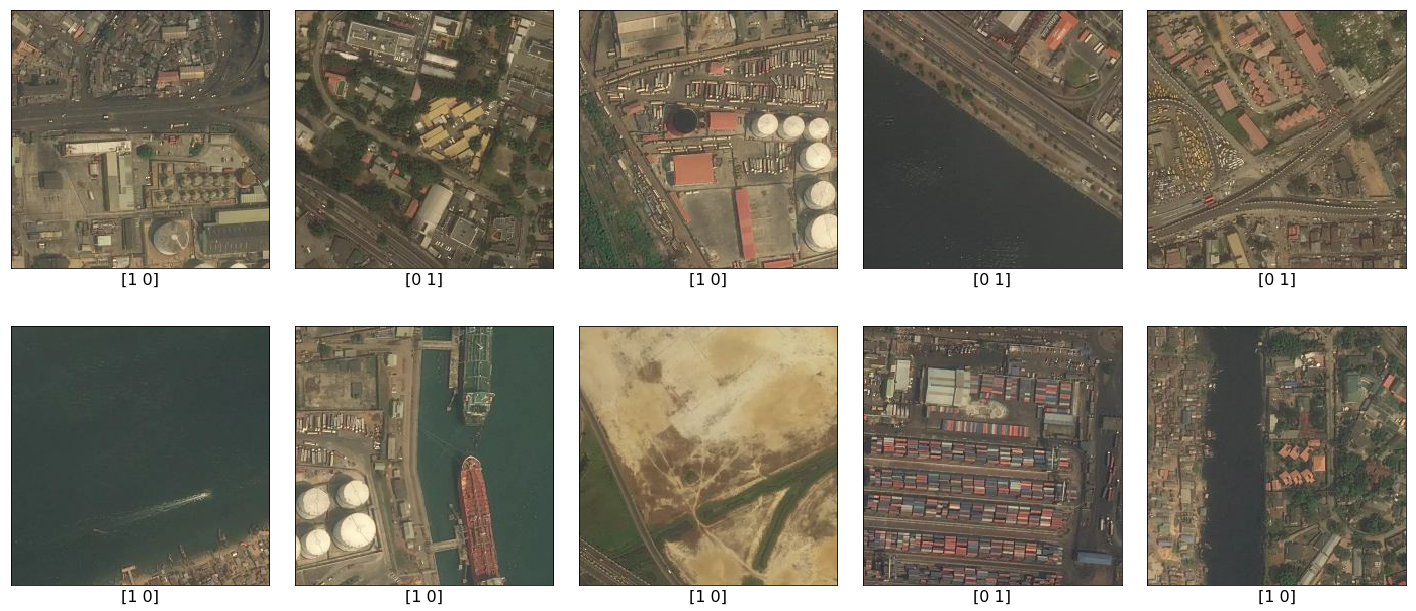

In [57]:
plt.figure(figsize =(25,25))
plt.subplots_adjust(bottom=0, top=0.35, wspace=0.1, hspace=0.01)
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_train_data[i])
    plt.xlabel(sample_label_data[i], fontsize=16)

## 2) Accessing Images for Object Detection

Configuration

    {
          "country": "nigeria", "bounding_box": [3.349, 6.434, 3.413,6.467],
          "zoom": 17,
          "classes": [
            { "name": "Buildings", "filter": ["has", "building"] }
          ],
          "imagery": "http://a.tiles.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}.jpg?access_token=ACCESS_TOKEN",
          "background_ratio": 1,
          "ml_type": "object-detection"
        }

In [1]:
!label-maker download --dest object_detection_dir --config object_detection.json

Saving QA tiles to object_detection_dir/nigeria.mbtiles
   100%    158.6 MiB       6.4 MiB/s            0:00:00 ETA    


In [2]:
!label-maker labels --dest object_detection_dir --config object_detection.json

Retiling QA Tiles to zoom level 17 (takes a bit)
3503 features, 255239 bytes of geometry, 4477 bytes of separate metadata, 79453 bytes of string pool
  99.9%  17/66769/63176  
Determining labels for each tile
---
Buildings: 2032 features in 131 tiles
Total tiles: 312
Writing out labels to object_detection_dir/labels.npz
Writing 66755-63180-17.png
Writing 66755-63181-17.png
Writing 66755-63188-17.png
Writing 66756-63185-17.png
Writing 66756-63181-17.png
Writing 66756-63179-17.png
Writing 66756-63182-17.png
Writing 66756-63180-17.png
Writing 66757-63179-17.png
Writing 66757-63182-17.png
Writing 66757-63181-17.png
Writing 66757-63184-17.png
Writing 66757-63180-17.png
Writing 66757-63188-17.png
Writing 66757-63186-17.png
Writing 66757-63187-17.png
Writing 66758-63181-17.png
Writing 66758-63180-17.png
Writing 66757-63185-17.png
Writing 66758-63185-17.png
Writing 66758-63184-17.png
Writing 66758-63183-17.png
Writing 66758-63182-17.png
Writing 66759-63185-17.png
Writing 66759-63184-17.png
Wri

#### Examples

In [56]:
!label-maker preview -n 10 --dest object_detection_dir --config object_detection.json

Writing example images to object_detection_dir/examples


plot examples

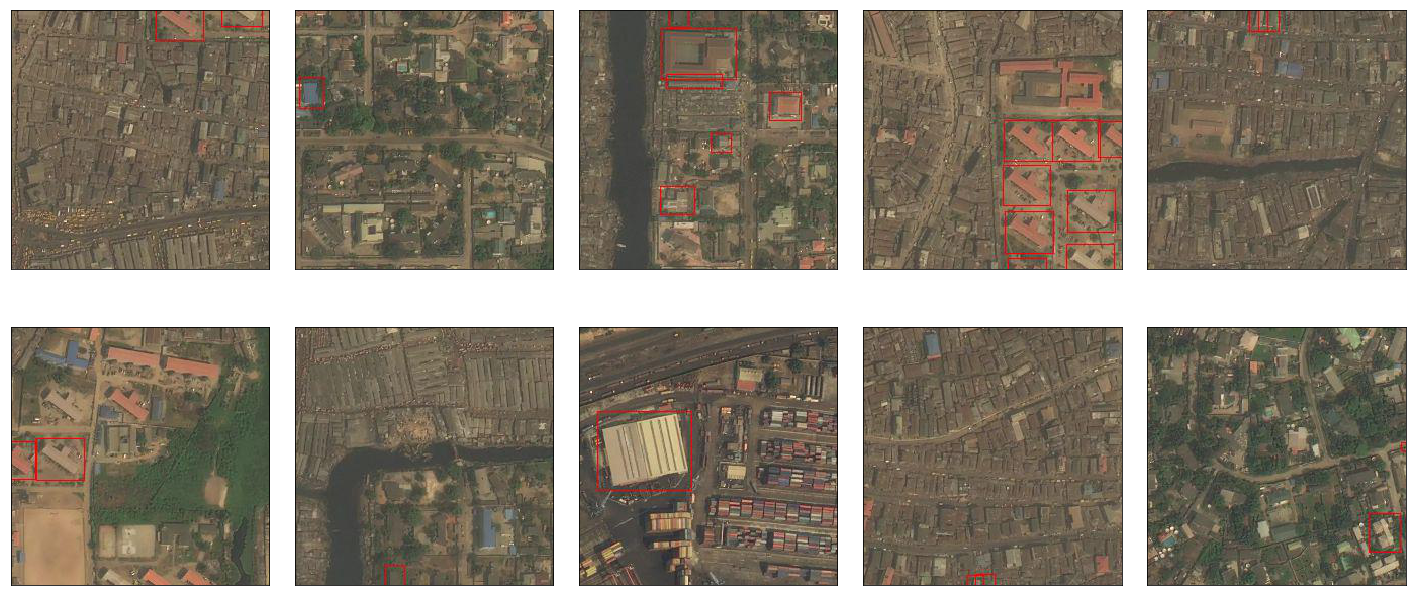

In [98]:

import matplotlib.image as mpimg

examples_dir = glob.glob("./object_detection_dir/examples/Buildings/*.jpg")

eg_imgs = [mpimg.imread(i) for i in examples_dir]

plt.figure(figsize =(25,25))
plt.subplots_adjust(bottom=0, top=0.35, wspace=0.1, hspace=0.01)
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(eg_imgs[i])
  

#### Download tiles

In [3]:
!label-maker images --dest object_detection_dir --config object_detection.json

#### Package/compile

In [4]:
!label-maker package --dest object_detection_dir --config object_detection.json

Saving packaged file to object_detection_dir/data.npz


## 3) Imagery for Image Segementation


    { "country": "nigeria",
      "bounding_box": [3.349, 6.434, 3.413, 6.467],
      "zoom": 17,
      "classes": [
        {"name": "Buildings", "filter": ["has", "building"] }
      ],
      "imagery": "http://a.tiles.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}.jpg?access_token=YOUR_ACCESS_TOKEN
      "background_ratio": 1,
      "ml_type": "segmentation"
    }

In [4]:
!label-maker download --dest segmentation_dir --config segementation.json

Saving QA tiles to segmentation_dir/nigeria.mbtiles
   100%    158.6 MiB       3.3 MiB/s            0:00:00 ETA    


In [5]:
!label-maker labels --dest segmentation_dir --config segementation.json

Retiling QA Tiles to zoom level 17 (takes a bit)
3503 features, 255239 bytes of geometry, 4477 bytes of separate metadata, 79453 bytes of string pool
  99.9%  17/66756/63175  
Determining labels for each tile
---
Buildings: 128 tiles
Total tiles: 312
Writing out labels to segmentation_dir/labels.npz
Writing 66755-63181-17.png
Writing 66755-63180-17.png
Writing 66755-63188-17.png
Writing 66756-63182-17.png
Writing 66756-63185-17.png
Writing 66756-63180-17.png
Writing 66756-63181-17.png
Writing 66756-63179-17.png
Writing 66757-63179-17.png
Writing 66757-63182-17.png
Writing 66757-63181-17.png
Writing 66757-63184-17.png
Writing 66757-63180-17.png
Writing 66757-63187-17.png
Writing 66757-63186-17.png
Writing 66757-63188-17.png
Writing 66757-63185-17.png
Writing 66758-63180-17.png
Writing 66758-63185-17.png
Writing 66758-63184-17.png
Writing 66758-63182-17.png
Writing 66758-63183-17.png
Writing 66759-63185-17.png
Writing 66759-63182-17.png
Writing 66759-63184-17.png
Writing 66759-63186-17.p

In [56]:
!label-maker images --dest segmentation_dir --config segementation.json

In [57]:
!label-maker package --dest segmentation_dir --config segementation.json

Saving packaged file to segmentation_dir/data.npz


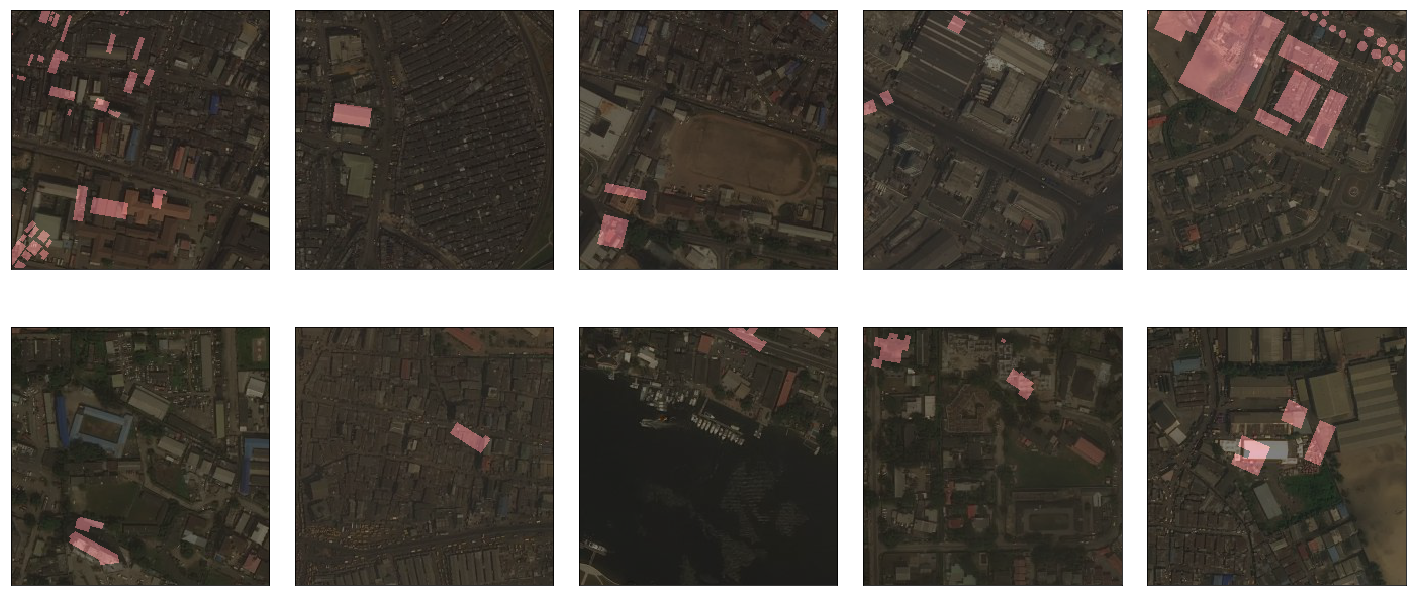

In [75]:
s_images_dir = glob.glob("./segmentation_dir/tiles/*.jpg")
s_labels_dir = glob.glob("./segmentation_dir/labels/*.png")

s_images = [mpimg.imread(i) for i in s_images_dir]
s_labels = [mpimg.imread(i) for i in s_labels_dir]

plt.figure(figsize =(25,25))
plt.subplots_adjust(bottom=0, top=0.35, wspace=0.1, hspace=0.01)
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(s_images[i])
    plt.imshow(s_labels[i], alpha =0.5)